In [1]:
import time
import xarray as xr
import numpy as np
from xcube.core.geocoded import reproject_dataset, compute_output_geom, GeoCoding
from xcube.core.sentinel3 import open_sentinel3_product

#from dask.distributed import Client
#client = None

In [2]:
#if client is not None:
#    client.close()

In [3]:
#client = Client()

In [4]:
path = 'C:\\Users\\Norman\\Downloads\\S3B_OL_1_EFR____20190728T103451_20190728T103751_20190729T141105_0179_028_108_1800_LN1_O_NT_002.SEN3'
tile_size = 2048, 1024

Open a Sentinel-3 OLCI L1b product:

In [5]:
src_ds = open_sentinel3_product(path)
src_ds

<xarray.Dataset>
Dimensions:         (columns: 4865, rows: 4091)
Dimensions without coordinates: columns, rows
Data variables:
    longitude       (rows, columns) float64 dask.array<chunksize=(819, 973), meta=np.ndarray>
    latitude        (rows, columns) float64 dask.array<chunksize=(819, 973), meta=np.ndarray>
    Oa18_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa21_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    detector_index  (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa16_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa11_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa19_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa13_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    quality_flags   (rows, columns) uint32 dask.array<chunksize=(819, 973), meta=np.ndarray>
    Oa06_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa02_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa17_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa01_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa03_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa14_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa15_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa10_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa20_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa08_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa05_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa12_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa07_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa04_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa09_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>

In [6]:
src_ds.Oa13_radiance

<xarray.DataArray 'Oa13_radiance' (rows: 4091, columns: 4865)>
dask.array<open_dataset-c4d815ef4b14de725398eeb37abd9b39Oa13_radiance, shape=(4091, 4865), dtype=float32, chunksize=(1023, 1217), chunktype=numpy.ndarray>
Dimensions without coordinates: rows, columns
Attributes:
    ancillary_variables:  Oa13_radiance_err
    coordinates:          time_stamp altitude latitude longitude
    long_name:            TOA radiance for OLCI acquisition band Oa13
    standard_name:        toa_upwelling_spectral_radiance
    units:                mW.m-2.sr-1.nm-1
    valid_max:            65534
    valid_min:            0

In [7]:
src_ds.Oa13_radiance.encoding

{'zlib': True,
 'shuffle': True,
 'complevel': 2,
 'fletcher32': False,
 'contiguous': False,
 'chunksizes': (1023, 1217),
 'source': 'C:\\Users\\Norman\\Downloads\\S3B_OL_1_EFR____20190728T103451_20190728T103751_20190729T141105_0179_028_108_1800_LN1_O_NT_002.SEN3\\Oa13_radiance.nc',
 'original_shape': (4091, 4865),
 'dtype': dtype('uint16'),
 '_FillValue': 65535,
 'scale_factor': 0.007861301,
 'add_offset': 0.0}

In [8]:
gc = GeoCoding.from_dataset(src_ds)

Preload x,y coordinates so we are faster:

In [9]:
gc.x.load()
gc.y.load()

<xarray.DataArray 'latitude' (rows: 4091, columns: 4865)>
array([[73.353817, 73.353724, 73.353631, ..., 69.392316, 69.390915,
        69.389513],
       [73.351265, 73.351172, 73.351079, ..., 69.390159, 69.388758,
        69.387356],
       [73.348713, 73.34862 , 73.348527, ..., 69.388002, 69.3866  ,
        69.385199],
       ...,
       [62.921048, 62.920886, 62.920725, ..., 59.966632, 59.96562 ,
        59.964609],
       [62.918494, 62.918333, 62.918172, ..., 59.964223, 59.963211,
        59.9622  ],
       [62.91594 , 62.915779, 62.915618, ..., 59.961814, 59.960802,
        59.959791]])
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      DEM corrected latitude
    standard_name:  latitude
    units:          degrees_north
    valid_max:      90000000
    valid_min:      -90000000

In [10]:
t1 = time.perf_counter()
og = compute_output_geom(src_ds, geo_coding=gc)
og = og.derive(tile_size=tile_size)
t2 = time.perf_counter()

In [11]:
t2 - t1

2.512302

In [12]:
t1 = time.perf_counter()
xy_bboxes = og.xy_bboxes
t2 = time.perf_counter()
xy_bboxes

array([[-11.918857  ,  59.959791  ,  -8.20671633,  61.81495461],
       [ -8.20490287,  59.959791  ,  -4.4927622 ,  61.81495461],
       [ -4.49094875,  59.959791  ,  -0.77880808,  61.81495461],
       [ -0.77699462,  59.959791  ,   2.93514605,  61.81495461],
       [  2.9369595 ,  59.959791  ,   6.64910017,  61.81495461],
       [  6.65091363,  59.959791  ,  10.3630543 ,  61.81495461],
       [ 10.36486775,  59.959791  ,  14.07700842,  61.81495461],
       [ 14.07882188,  59.959791  ,  17.79096255,  61.81495461],
       [ 17.792776  ,  59.959791  ,  21.50491667,  61.81495461],
       [ 21.50673013,  59.959791  ,  24.81809743,  61.81495461],
       [-11.918857  ,  61.81676806,  -8.20671633,  63.67193167],
       [ -8.20490287,  61.81676806,  -4.4927622 ,  63.67193167],
       [ -4.49094875,  61.81676806,  -0.77880808,  63.67193167],
       [ -0.77699462,  61.81676806,   2.93514605,  63.67193167],
       [  2.9369595 ,  61.81676806,   6.64910017,  63.67193167],
       [  6.65091363,  61

In [13]:
t2 - t1

0.000544800000000123

In [14]:
t1 = time.perf_counter()
ij_bboxes = gc.ij_bboxes(xy_bboxes)
t2 = time.perf_counter()
ij_bboxes

array([[  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [2664, 4033, 2896, 4090],
       [2879, 3823, 3668, 4090],
       [3563, 3578, 4480, 4090],
       [4241, 3316, 4864, 4090],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [   0, 3740,  706, 4090],
       [ 663, 3647, 1419, 4090],
       [1336, 3520, 2144, 4090],
       [1999, 3355, 2877, 4090],
       [2659, 3160, 3562, 4031],
       [3302, 2933, 4239, 3820],
       [3936, 2674, 4864, 3576],
       [4559, 2529, 4864, 3238],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [   0, 3025,  660, 3793],
       [ 576, 2942, 1334, 3738],
       [1204, 2827, 1998, 3645],
       [1824, 2678, 2657, 3518],
       [2441, 2495, 3300, 3353],
       [3048, 2284, 3935, 3158],
       [3637, 2044, 4557, 2931],
       [4220, 1774, 4864, 2671],
       [4784, 1730, 4864, 1906],
       [  -1,   -1,   -1,   -1],
       [  

In [15]:
t2 - t1

3.412162799999999

In [16]:
t1 = time.perf_counter()
ij_bboxes = gc.ij_bboxes(xy_bboxes, gu=True)
t2 = time.perf_counter()
ij_bboxes

array([[  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [2664, 4033, 2896, 4090],
       [2879, 3823, 3668, 4090],
       [3563, 3578, 4480, 4090],
       [4241, 3316, 4864, 4090],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [   0, 3740,  706, 4090],
       [ 663, 3647, 1419, 4090],
       [1336, 3520, 2144, 4090],
       [1999, 3355, 2877, 4090],
       [2659, 3160, 3562, 4031],
       [3302, 2933, 4239, 3820],
       [3936, 2674, 4864, 3576],
       [4559, 2529, 4864, 3238],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [   0, 3025,  660, 3793],
       [ 576, 2942, 1334, 3738],
       [1204, 2827, 1998, 3645],
       [1824, 2678, 2657, 3518],
       [2441, 2495, 3300, 3353],
       [3048, 2284, 3935, 3158],
       [3637, 2044, 4557, 2931],
       [4220, 1774, 4864, 2671],
       [4784, 1730, 4864, 1906],
       [  -1,   -1,   -1,   -1],
       [  

In [17]:
t2 - t1

3.0460916000000005

Preload x,y coordinates so we are faster:

If `tile_size` is given, the reprojected data variables will be lazy dask arrays:

In [18]:
t1 = time.perf_counter()
dst_ds = reproject_dataset(src_ds, var_names='Oa13_radiance', geo_coding=gc, output_geom=og)
t2 = time.perf_counter()

computing src_ij_bboxes took 2.583878500000001 seconds
<xarray.DataArray (dim_0: 80, dim_1: 4)>
array([[  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [2661, 4031, 2897, 4090],
       [2878, 3821, 3669, 4090],
       [3562, 3577, 4481, 4090],
       [4240, 3314, 4864, 4090],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [   0, 3739,  707, 4090],
       [ 662, 3646, 1420, 4090],
       [1334, 3518, 2145, 4090],
       [1998, 3353, 2879, 4090],
       [2658, 3159, 3563, 4032],
       [3300, 2932, 4241, 3822],
       [3935, 2672, 4864, 3578],
       [4558, 2528, 4864, 3240],
       [  -1,   -1,   -1,   -1],
       [  -1,   -1,   -1,   -1],
       [   0, 3023,  663, 3794],
       [ 575, 2940, 1335, 3740],
       [1203, 2825, 1999, 3647],
       [1823, 2676, 2659, 3519],
       [2439, 2493, 3301, 3355],
       [3047, 2283, 3936, 3160],
       [3636, 2042, 4559, 2933],
       [4219,

In [19]:
t2 - t1

3.2275205999999983

In [20]:
dst_ds

<xarray.Dataset>
Dimensions:        (latitude: 7386, longitude: 20259)
Coordinates:
  * longitude      (longitude) float64 -11.92 -11.92 -11.92 ... 24.82 24.82
  * latitude       (latitude) float64 59.96 59.96 59.96 ... 73.35 73.35 73.35
Data variables:
    Oa13_radiance  (latitude, longitude) float32 dask.array<chunksize=(1024, 2048), meta=np.ndarray>

In [21]:
Oa13_radiance = dst_ds.Oa13_radiance
Oa13_radiance

<xarray.DataArray 'Oa13_radiance' (latitude: 7386, longitude: 20259)>
dask.array<Oa13_radiance, shape=(7386, 20259), dtype=float32, chunksize=(1024, 2048), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float64 -11.92 -11.92 -11.92 ... 24.81 24.82 24.82
  * latitude   (latitude) float64 59.96 59.96 59.96 59.97 ... 73.35 73.35 73.35
Attributes:
    ancillary_variables:  Oa13_radiance_err
    coordinates:          time_stamp altitude latitude longitude
    long_name:            TOA radiance for OLCI acquisition band Oa13
    standard_name:        toa_upwelling_spectral_radiance
    units:                mW.m-2.sr-1.nm-1
    valid_max:            65534
    valid_min:            0

In [22]:
Oa13_radiance.chunks

((1024, 1024, 1024, 1024, 1024, 1024, 1024, 218),
 (2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 1827))

In [23]:
Oa13_radiance.data

dask.array<Oa13_radiance, shape=(7386, 20259), dtype=float32, chunksize=(1024, 2048), chunktype=numpy.ndarray>

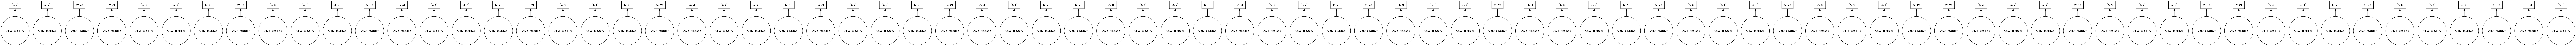

In [24]:
Oa13_radiance.data.visualize()

In [25]:
encoding = {name: dict(chunks=tuple(var.chunks[i][0] for i in (-2, -1))) for name, var in dst_ds.data_vars.items()}
encoding

{'Oa13_radiance': {'chunks': (1024, 2048)}}

In [26]:
t1 = time.perf_counter()
# dst_ds.to_zarr('test.zarr', encoding=encoding)
t2 = time.perf_counter()

In [27]:
t2 - t1

4.080000000072914e-05

In [28]:
t1 = time.perf_counter()
Oa13_radiance = Oa13_radiance.load()
t2 = time.perf_counter()

target chunk Oa13_radiance-(0, 3), shape (1024, 2048) for source shape (237, 60) took 0.0007885999999999171, 4.298607400000002 seconds, total 4.2993960000000015target chunk Oa13_radiance-(0, 6), shape (1024, 2048) for source shape (625, 777) took 0.0011009000000008484, 4.281289099999999 seconds, total 4.2823899999999995
target chunk Oa13_radiance-(0, 5), shape (1024, 2048) for source shape (920, 514) took 0.0009982000000015034, 4.6247276999999976 seconds, total 4.625725899999999target chunk Oa13_radiance-(0, 4), shape (1024, 2048) for source shape (792, 270) took 0.001285100000000483, 5.650213600000001 seconds, total 5.651498700000001target chunk Oa13_radiance-(1, 0), shape (1024, 2048) for source shape (708, 352) took 0.0010356000000015797, 5.6171446 seconds, total 5.618180200000001target chunk Oa13_radiance-(1, 2), shape (1024, 2048) for source shape (812, 573) took 0.0007424000000000319, 5.579427899999999 seconds, total 5.580170299999999


target chunk Oa13_radiance-(1, 1), shape (1

In [29]:
t2 - t1

43.2592171

In [30]:
Oa13_radiance.plot.imshow(figsize=(16,16), vmax=40, cmap='Greys_r')

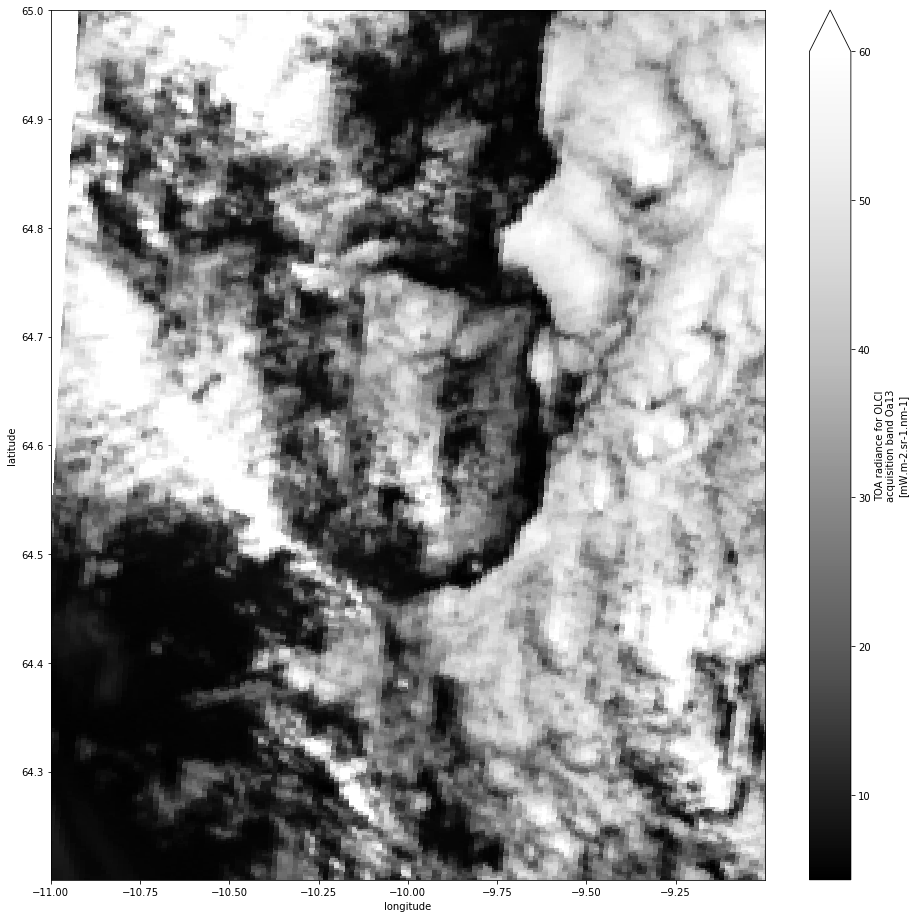

In [31]:
Oa13_radiance.sel(longitude=slice(-11, -9), latitude=slice(64.2,65)).plot.imshow(figsize=(16,16), vmax=60, cmap='Greys_r')